In [2]:
import pandas as pd
from scipy.spatial import distance
import numpy as np

# Reading paths
INDIR = "../../data/"
INDIR3 = "../../plot_data/3/"
INDIR5 = "../../plot_data/5/"
# Path to where we will save our processed files
OUTDIR = "../../plots/"

In [4]:
df_control = pd.read_csv(INDIR3+"/RWMAG_rematched_control_augmented_rematching_30perc.csv",
                              usecols=['MAGAID','MatchMAGAID','RetractionYear','MAGRetractionYearAffID',
                             'MAGRetractionYearAffRank',
                             'MAGRetractionYearAffYear',
                             'MatchMAGRetractionYearAffID',
                             'MatchMAGRetractionYearAffYear',
                             'MatchMAGRetractionYearAffRank',
                            'MAGRetractionYearAffRankOrdinal',
                            'MAGRetractionYearAffRankStratified'])\
                            .drop_duplicates()

df_affiliations = pd.read_csv(INDIR5+"Affiliations.txt", sep='\t', header=None,
                             usecols=[0,10]).drop_duplicates()\
                            .rename(columns={0:'MAGRetractionYearAffID',10:'CountryAbbr'})

df_control = df_control.merge(df_affiliations, on='MAGRetractionYearAffID', how='left')\
                .merge(df_affiliations.rename(columns={'MAGRetractionYearAffID':'MatchMAGRetractionYearAffID',
                                                      'CountryAbbr': 'MatchCountryAbbr'}
                                                     ), on='MatchMAGRetractionYearAffID', how='left')

# Total matches
total_author_matches = df_control.shape[0]


matches_w_same_country = df_control[df_control['CountryAbbr'] == df_control['MatchCountryAbbr']].shape[0]
matches_wo_same_country = df_control[df_control['CountryAbbr'] != df_control['MatchCountryAbbr']].shape[0]

perc_same_country = round(matches_w_same_country*100/total_author_matches, 2)
perc_notsame_country = round(matches_wo_same_country*100/total_author_matches, 2)

print(f"Percentage of total matches in the same country:{perc_same_country}")
print(f"Percentage of total matches not in the same country:{perc_notsame_country}")

Percentage of total matches in the same country:22.78
Percentage of total matches not in the same country:77.22


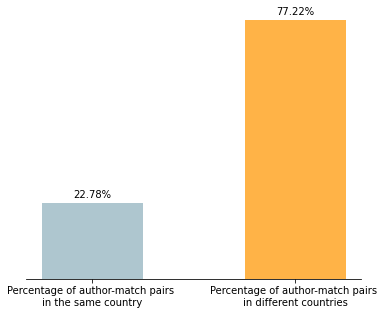

In [5]:
import matplotlib.pyplot as plt

# Data for plotting
categories = ['Percentage of author-match pairs \nin the same country', 
              'Percentage of author-match pairs \nin different countries']

percentages = [perc_same_country, perc_notsame_country]
colors = ['#AEC6CF', '#FFB347']  # pastel colors

# Create the bar plot
plt.figure(figsize=(6, 5))
plt.bar(categories, percentages, color=colors, width=0.5)


# Add percentage labels on top of the bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 1, f'{percentage}%', ha='center', va='bottom')

    
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove y-axis ticks
ax.yaxis.set_ticks([])

# Display the plot
plt.savefig(OUTDIR+"author_matches_country_analysis_new.pdf", format='pdf')

In [6]:
# pLOTTing distributions
df_retracted = (df_control[['MAGAID','CountryAbbr']].drop_duplicates()['CountryAbbr'].value_counts()*100/\
        df_control[['MAGAID','CountryAbbr']].drop_duplicates().shape[0]).reset_index()\
        .rename(columns={'count':'Percentage',
                        'CountryAbbr':'Country'})
df_retracted

,Country,Percentage
0,CN,21.716957
1,US,19.889503
2,JP,6.927327
3,DE,5.227369
4,IT,5.099873
5,KR,4.419890
6,GB,3.484913
7,CA,2.932427
8,ES,2.549936
9,BR,2.124947


In [7]:
df_nonretracted = (df_control[['MatchMAGAID','MatchCountryAbbr']].drop_duplicates()['MatchCountryAbbr'].value_counts()*100/\
        df_control[['MatchMAGAID','MatchCountryAbbr']].drop_duplicates().shape[0]).reset_index()\
        .rename(columns={'count':'Percentage',
                        'MatchCountryAbbr':'Country'})
df_nonretracted

,Country,Percentage
0,US,21.601442
1,CN,18.820803
2,JP,6.256437
3,DE,5.870237
4,GB,4.994851
5,IT,4.376931
6,BR,3.707518
7,ES,3.527291
8,CA,3.218332
9,FR,2.729145


In [8]:
set2 = set(df_control[['MatchMAGAID','MatchCountryAbbr']].drop_duplicates()['MatchCountryAbbr'].value_counts().reset_index()\
        .head(20)['MatchCountryAbbr'].unique())

In [9]:
set1 = set(df_control[['MAGAID','CountryAbbr']].drop_duplicates()['CountryAbbr'].value_counts().reset_index()\
        .head(20)['CountryAbbr'].unique())

In [10]:
set1.intersection(set2)

{'AU',
 'BR',
 'CA',
 'CN',
 'DE',
 'ES',
 'FR',
 'GB',
 'IN',
 'IT',
 'JP',
 'KR',
 'NL',
 'SE',
 'TR',
 'TW',
 'US'}

In [11]:
# Filter top 20 countries from both dataframes
top_20_retracted = df_retracted.nlargest(20, 'Percentage')
top_20_nonretracted = df_nonretracted.nlargest(20, 'Percentage')

# Merge dataframes to align countries
merged_df = pd.merge(top_20_retracted, top_20_nonretracted, on='Country', how='inner', suffixes=('_retracted', '_nonretracted'))

merged_df

,Country,Percentage_retracted,Percentage_nonretracted
0,CN,21.716957,18.820803
1,US,19.889503,21.601442
2,JP,6.927327,6.256437
3,DE,5.227369,5.870237
4,IT,5.099873,4.376931
5,KR,4.419890,2.265705
6,GB,3.484913,4.994851
7,CA,2.932427,3.218332
8,ES,2.549936,3.527291
9,BR,2.124947,3.707518


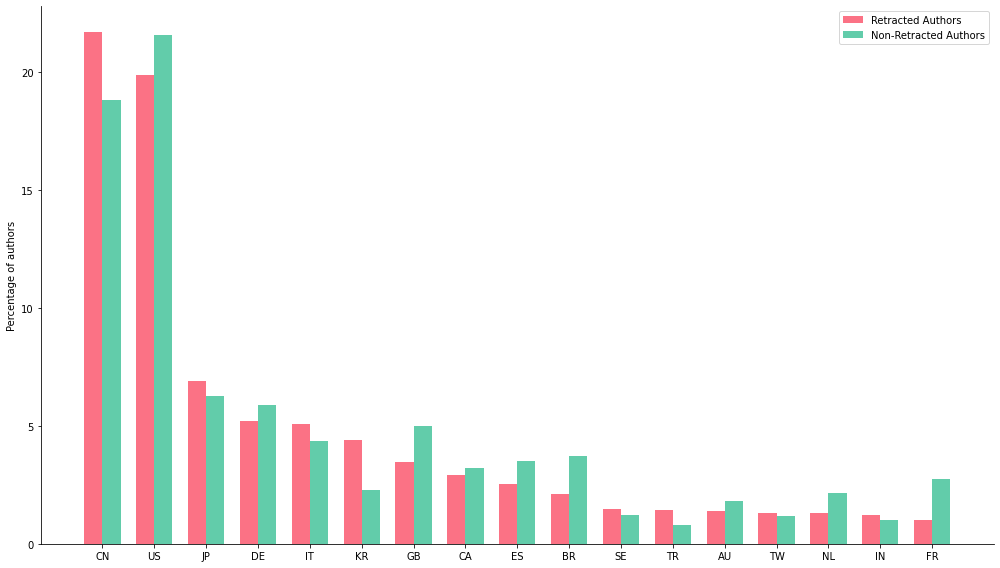

In [12]:
# Plotting
plt.figure(figsize=(14, 8))
plt.rcParams['axes.facecolor'] = 'white'  # Set plot area background to white
plt.rcParams['savefig.facecolor'] = 'white'  # Set figure background to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background to white

bar_width = 0.35
index = range(len(merged_df))

plt.bar(index, merged_df['Percentage_retracted'], bar_width, label='Retracted Authors', color='#fb7285')
plt.bar([i + bar_width for i in index], merged_df['Percentage_nonretracted'], bar_width, label='Non-Retracted Authors', color='#62ccaa')

# Adding labels and title
plt.ylabel('Percentage of authors')
plt.xticks([i + bar_width / 2 for i in index], merged_df['Country'])
plt.legend()

    
# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Ensure tight layout for clean rendering
plt.tight_layout()
plt.savefig(OUTDIR+"author_match_country_distribution_new.pdf", format='pdf')